# CSE 555 - Introduction to pattern recognition
## Problem Set 5: Generative models





## Problem 1

### Derive the restricted Boltzmann machine algorithm that you will implement, and explain your derivation. Implement the training and inference algorithms for RBM. Train RBMs with 20, 100 and 500 hidden nodes to generate MNIST images using the training data set. Generate MNIST images from the ones in the testing data set that have 20%, 50% and 80% pixels missing/removed. You are free to choose whether you want to use binary nodes or floating point nodes, but the derivation has to match the implementation.

Restricted Boltzmann Machine is an undirected, energy based graphical model. It has a visible layer $v$ and a hidden layer $h$. 

An RBM is defined by its energy function $\displaystyle E( v,\ h)$:

\begin{equation*}
E( v,\ h) \ =\ -b^{T} v-c^{T} h-v^{T} Wh
\end{equation*}
here $b$ represents the $k$ nodes of the visible layer; $c$ represents the $j$ nodes of the hidden layer. $b$ and $c$ are termed bias vectors.

The energy function defines the joint probability distribution:

\begin{equation*}
p( v,\ h) \ =\ \frac{1}{z} exp\{-E( v,\ h)\}
\end{equation*}
<br>
$Z$ is the normalizing partition function:

\begin{equation*}
Z\ =\ \sum _{v}\sum _{h} exp\{-E( v,\ h)\}
\end{equation*}
<br>
The objective is to increase $\displaystyle p( v,\ h)$ thereby decreasing the energy function.

Introducing some non-observed variables into the model to handle cases when $x$ is only partially observable. Observed part and hidden part $h$:

\begin{equation*}
p( x) \ =\ \sum _{h}\sum _{v} p( x,\ h) \ =\ \sum _{h}\frac{e^{-E( x,\ h)}}{Z} \quad \quad \text{- eq 1}
\end{equation*}

From this, free energy is given by:

\begin{equation}
F( x) \ =\ -\log\sum _{h} e^{-E( x,\ h)} \quad \quad \text{- eq 2}
\end{equation}

Substituting eq 2 in eq 1, taking log and differentiating wrt $\theta$ gives negative and positive phases:

\begin{equation*}
\frac{\partial \log p( x)}{\partial \theta } \ =\ \frac{\partial F( x)}{\partial \theta } \ =\ -\sum p( x')\frac{\partial F( x')}{\partial \theta }
\end{equation*}


\begin{equation*}
E( v,\ h) \ =\ -b^{T} v-c^{T} h-v^{T} Wh\ =\ -\sum _{k} b_{k} v_{k} -\sum _{j} c_{j} h_{j} -\sum _{j}\sum _{k} W_{jk} h_{j} v_{k}
\end{equation*}

To maximize probability, first 2 terms in RHS should be as large as possible.<br>
If $b$ is negative -> $v$ = 0 and 1.<br>
If $c$ is negative -> $h$ = 0 and 1.<br>
If $W_{jk}$ is negative -> $h$ or $v$ or both $h$ and $v$ = 0.<br>
If $W_{jk}$ is positive -> $h$ or $v$ = 1.<br>
<br>
\begin{equation*}
Z\ =\ \sum _{v}\sum _{h} exp\{-E( v,\ h)\}
\end{equation*}
is intractable but conditional probability is easy to compute and sample from.
So considering $\displaystyle p( h|v)$:<br>
Use Gibbs sampling for this purpose

\begin{equation*}
p( h|v) \ =\ \prod _{j} p( h_{j} |v)
\end{equation*}

\begin{equation*}
p( v|h) \ =\ \prod _{k}( v_{k} |h)
\end{equation*}

Considering binary units -> $v_k$ and $h_j\epsilon \{ 0,1 \}$.<br>
Probabilistic version of the neuron activation function is:

\begin{equation*}
P( h_{j}) \ =\ 1|v\ =\ sigm\ ( c_{j} \ +\ W_{j} v)
\end{equation*}

\begin{equation*}
P( v_{k}) \ =\ 1|h\ =\ sigm\ ( b_{k} \ +\ W'_{k} h)
\end{equation*}

The free energy of the RBM becomes:

\begin{equation*}
F( v) \ =-b'v=\sum _{i}\log\left( 1+e^{c_{i} +E_{i} v}\right)
\end{equation*}

In this implementation, following updation equations are used. Following log-likelihood gradients for an RBM with binary units are obtained:
The negative phase gradient denoted by $N$ combined with the free energy equation:

\begin{equation*}
\frac{-\partial \log p( v)}{\partial W_{jk}} \ =\ E_{v}[ p( h_{x} |v) v_{j}] -v^{k}_{j} sigm\left( W_{i} v^{i} +c_{i}\right)
\end{equation*}

\begin{equation*}
\frac{-\partial \log p( v)}{\partial c_{k}} =E_{v}[ p( h_{k} |v)] -sigm\left( W_{k} v^{k}\right)
\end{equation*}

\begin{equation*}
\frac{-\partial \log p( v)}{\partial b_{j}} =E_{v}[ p( v_{j} |h)] -v^{k}_{j}
\end{equation*}

Using Gibbs sampling, obtaining the samples of $p(x)$ and running a Markov chain to convergence:
<br><br>
Gibbs sampling of the joint of N random variables $\displaystyle S\ =\ ( S_{1} ,\ \dotsc ,\ S_{N})$ is done through a sequence of N-sampling sub-steps of the form $\displaystyle S_{i} \approx p( S_{i} |S_{-i})$ where $S_{-i}$ contains the $N - 1$ other random variables in $S$ excluding $S_i$.
<br><br>
$S$ consists of visible and hidden units. Since they are conditionally independent block Gibbs sampling can be performed on them. 
<br><br>
The following steps are used in Markov chain:

\begin{equation*}
h^{( n+1)} \sim sigm\left( W'v^{( n)} +c\right)
\end{equation*}

\begin{equation*}
v^{( n+1)} \sim sigm\left( Wh^{( n+1)} +b\right)
\end{equation*}

$h^n$ is the set of all hidden units at the n-th step of the Markov chain.
<br><br>

Contrastive divergence, which speeds up the sampling process, is applied.
<br><br>

The target is to have $\displaystyle p( v) \approx p_{train}( v)$.

Contrastive divergence does not wait for the chain to converge. Samples are obtained after only k-steps of Gibbs sampling.


In [0]:
#Script to load dataset, taken from TensorFlow's source code

# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Functions for downloading and reading MNIST data (deprecated).

This module and all its submodules are deprecated.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import gzip
import os

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin

from tensorflow.python.framework import dtypes
from tensorflow.python.framework import random_seed
from tensorflow.python.platform import gfile
from tensorflow.python.util.deprecation import deprecated

_Datasets = collections.namedtuple('_Datasets', ['train', 'validation', 'test'])

# CVDF mirror of http://yann.lecun.com/exdb/mnist/
DEFAULT_SOURCE_URL = 'https://storage.googleapis.com/cvdf-datasets/mnist/'


def _read32(bytestream):
  dt = numpy.dtype(numpy.uint32).newbyteorder('>')
  return numpy.frombuffer(bytestream.read(4), dtype=dt)[0]


@deprecated(None, 'Please use tf.data to implement this functionality.')
def _extract_images(f):
  """Extract the images into a 4D uint8 numpy array [index, y, x, depth].

  Args:
    f: A file object that can be passed into a gzip reader.

  Returns:
    data: A 4D uint8 numpy array [index, y, x, depth].

  Raises:
    ValueError: If the bytestream does not start with 2051.

  """
  print('Extracting', f.name)
  with gzip.GzipFile(fileobj=f) as bytestream:
    magic = _read32(bytestream)
    if magic != 2051:
      raise ValueError('Invalid magic number %d in MNIST image file: %s' %
                       (magic, f.name))
    num_images = _read32(bytestream)
    rows = _read32(bytestream)
    cols = _read32(bytestream)
    buf = bytestream.read(rows * cols * num_images)
    data = numpy.frombuffer(buf, dtype=numpy.uint8)
    data = data.reshape(num_images, rows, cols, 1)
    return data


@deprecated(None, 'Please use tf.one_hot on tensors.')
def _dense_to_one_hot(labels_dense, num_classes):
  """Convert class labels from scalars to one-hot vectors."""
  num_labels = labels_dense.shape[0]
  index_offset = numpy.arange(num_labels) * num_classes
  labels_one_hot = numpy.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot


@deprecated(None, 'Please use tf.data to implement this functionality.')
def _extract_labels(f, one_hot=False, num_classes=10):
  """Extract the labels into a 1D uint8 numpy array [index].

  Args:
    f: A file object that can be passed into a gzip reader.
    one_hot: Does one hot encoding for the result.
    num_classes: Number of classes for the one hot encoding.

  Returns:
    labels: a 1D uint8 numpy array.

  Raises:
    ValueError: If the bystream doesn't start with 2049.
  """
  print('Extracting', f.name)
  with gzip.GzipFile(fileobj=f) as bytestream:
    magic = _read32(bytestream)
    if magic != 2049:
      raise ValueError('Invalid magic number %d in MNIST label file: %s' %
                       (magic, f.name))
    num_items = _read32(bytestream)
    buf = bytestream.read(num_items)
    labels = numpy.frombuffer(buf, dtype=numpy.uint8)
    if one_hot:
      return _dense_to_one_hot(labels, num_classes)
    return labels


class _DataSet(object):
  """Container class for a _DataSet (deprecated).

  THIS CLASS IS DEPRECATED.
  """

  @deprecated(None, 'Please use alternatives such as official/mnist/_DataSet.py'
              ' from tensorflow/models.')
  def __init__(self,
               images,
               labels,
               fake_data=False,
               one_hot=False,
               dtype=dtypes.float32,
               reshape=True,
               seed=None):
    """Construct a _DataSet.

    one_hot arg is used only if fake_data is true.  `dtype` can be either
    `uint8` to leave the input as `[0, 255]`, or `float32` to rescale into
    `[0, 1]`.  Seed arg provides for convenient deterministic testing.

    Args:
      images: The images
      labels: The labels
      fake_data: Ignore inages and labels, use fake data.
      one_hot: Bool, return the labels as one hot vectors (if True) or ints (if
        False).
      dtype: Output image dtype. One of [uint8, float32]. `uint8` output has
        range [0,255]. float32 output has range [0,1].
      reshape: Bool. If True returned images are returned flattened to vectors.
      seed: The random seed to use.
    """
    seed1, seed2 = random_seed.get_seed(seed)
    # If op level seed is not set, use whatever graph level seed is returned
    numpy.random.seed(seed1 if seed is None else seed2)
    dtype = dtypes.as_dtype(dtype).base_dtype
    if dtype not in (dtypes.uint8, dtypes.float32):
      raise TypeError('Invalid image dtype %r, expected uint8 or float32' %
                      dtype)
    if fake_data:
      self._num_examples = 10000
      self.one_hot = one_hot
    else:
      assert images.shape[0] == labels.shape[0], (
          'images.shape: %s labels.shape: %s' % (images.shape, labels.shape))
      self._num_examples = images.shape[0]

      # Convert shape from [num examples, rows, columns, depth]
      # to [num examples, rows*columns] (assuming depth == 1)
      if reshape:
        assert images.shape[3] == 1
        images = images.reshape(images.shape[0],
                                images.shape[1] * images.shape[2])
      if dtype == dtypes.float32:
        # Convert from [0, 255] -> [0.0, 1.0].
        images = images.astype(numpy.float32)
        images = numpy.multiply(images, 1.0 / 255.0)
    self._images = images
    self._labels = labels
    self._epochs_completed = 0
    self._index_in_epoch = 0

  @property
  def images(self):
    return self._images

  @property
  def labels(self):
    return self._labels

  @property
  def num_examples(self):
    return self._num_examples

  @property
  def epochs_completed(self):
    return self._epochs_completed

  def next_batch(self, batch_size, fake_data=False, shuffle=True):
    """Return the next `batch_size` examples from this data set."""
    if fake_data:
      fake_image = [1] * 784
      if self.one_hot:
        fake_label = [1] + [0] * 9
      else:
        fake_label = 0
      return [fake_image for _ in xrange(batch_size)
             ], [fake_label for _ in xrange(batch_size)]
    start = self._index_in_epoch
    # Shuffle for the first epoch
    if self._epochs_completed == 0 and start == 0 and shuffle:
      perm0 = numpy.arange(self._num_examples)
      numpy.random.shuffle(perm0)
      self._images = self.images[perm0]
      self._labels = self.labels[perm0]
    # Go to the next epoch
    if start + batch_size > self._num_examples:
      # Finished epoch
      self._epochs_completed += 1
      # Get the rest examples in this epoch
      rest_num_examples = self._num_examples - start
      images_rest_part = self._images[start:self._num_examples]
      labels_rest_part = self._labels[start:self._num_examples]
      # Shuffle the data
      if shuffle:
        perm = numpy.arange(self._num_examples)
        numpy.random.shuffle(perm)
        self._images = self.images[perm]
        self._labels = self.labels[perm]
      # Start next epoch
      start = 0
      self._index_in_epoch = batch_size - rest_num_examples
      end = self._index_in_epoch
      images_new_part = self._images[start:end]
      labels_new_part = self._labels[start:end]
      return numpy.concatenate((images_rest_part, images_new_part),
                               axis=0), numpy.concatenate(
                                   (labels_rest_part, labels_new_part), axis=0)
    else:
      self._index_in_epoch += batch_size
      end = self._index_in_epoch
      return self._images[start:end], self._labels[start:end]


@deprecated(None, 'Please write your own downloading logic.')
def _maybe_download(filename, work_directory, source_url):
  """Download the data from source url, unless it's already here.

  Args:
      filename: string, name of the file in the directory.
      work_directory: string, path to working directory.
      source_url: url to download from if file doesn't exist.

  Returns:
      Path to resulting file.
  """
  if not gfile.Exists(work_directory):
    gfile.MakeDirs(work_directory)
  filepath = os.path.join(work_directory, filename)
  if not gfile.Exists(filepath):
    urllib.request.urlretrieve(source_url, filepath)
    with gfile.GFile(filepath) as f:
      size = f.size()
    print('Successfully downloaded', filename, size, 'bytes.')
  return filepath


@deprecated(None, 'Please use alternatives such as:'
            ' tensorflow_datasets.load(\'mnist\')')
def read_data_sets(train_dir,
                   fake_data=False,
                   one_hot=False,
                   dtype=dtypes.float32,
                   reshape=True,
                   validation_size=5000,
                   seed=None,
                   source_url=DEFAULT_SOURCE_URL):
  if fake_data:

    def fake():
      return _DataSet([], [],
                      fake_data=True,
                      one_hot=one_hot,
                      dtype=dtype,
                      seed=seed)

    train = fake()
    validation = fake()
    test = fake()
    return _Datasets(train=train, validation=validation, test=test)

  if not source_url:  # empty string check
    source_url = DEFAULT_SOURCE_URL

  train_images_file = 'train-images-idx3-ubyte.gz'
  train_labels_file = 'train-labels-idx1-ubyte.gz'
  test_images_file = 't10k-images-idx3-ubyte.gz'
  test_labels_file = 't10k-labels-idx1-ubyte.gz'

  local_file = _maybe_download(train_images_file, train_dir,
                               source_url + train_images_file)
  with gfile.Open(local_file, 'rb') as f:
    train_images = _extract_images(f)

  local_file = _maybe_download(train_labels_file, train_dir,
                               source_url + train_labels_file)
  with gfile.Open(local_file, 'rb') as f:
    train_labels = _extract_labels(f, one_hot=one_hot)

  local_file = _maybe_download(test_images_file, train_dir,
                               source_url + test_images_file)
  with gfile.Open(local_file, 'rb') as f:
    test_images = _extract_images(f)

  local_file = _maybe_download(test_labels_file, train_dir,
                               source_url + test_labels_file)
  with gfile.Open(local_file, 'rb') as f:
    test_labels = _extract_labels(f, one_hot=one_hot)

  if not 0 <= validation_size <= len(train_images):
    raise ValueError(
        'Validation size should be between 0 and {}. Received: {}.'.format(
            len(train_images), validation_size))

  validation_images = train_images[:validation_size]
  validation_labels = train_labels[:validation_size]
  train_images = train_images[validation_size:]
  train_labels = train_labels[validation_size:]

  options = dict(dtype=dtype, reshape=reshape, seed=seed)

  train = _DataSet(train_images, train_labels, **options)
  validation = _DataSet(validation_images, validation_labels, **options)
  test = _DataSet(test_images, test_labels, **options)

  return _Datasets(train=train, validation=validation, test=test)


In [2]:
# Necessary imports for problem 1

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import random
import struct
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
#Reference: http://lyy1994.github.io/machine-learning/2017/04/17/RBM-tensorflow-implementation.html

#Defining a class consisting of repeatedly performed operations such as removing pixels and shuffling the dataset
class DataSet:
    batch_i = 0
    def __init__(self, data_dir, batch_size = None, one_hot = False, seed = 0):
        self.data_dir = data_dir
        X, Y = self.read()
        shape = X.shape
        X = X.reshape([shape[0], shape[1] * shape[2]])
        self.X = X.astype(np.float)/255
        self.size = self.X.shape[0]

        if batch_size == None:
            self.batch_size = self.size
        else:
            self.batch_size = batch_size

        self.batch_number = int(self.size / self.batch_size)
        
        # shuffle samples
        np.random.seed(seed)
        np.random.shuffle(self.X)
        np.random.seed(seed)
        np.random.shuffle(Y)

        #One-hot encoding the labels
        self.one_hot = one_hot
        if one_hot:
            y_vec = np.zeros((len(Y), 10), dtype=np.float)
            for i, label in enumerate(Y):
                y_vec[i, Y[i]] = 1.0
            self.Y = y_vec
        else:
            self.Y = Y
    
    #Removing random pixels. Number of pixels to be removed is specified by the 'percent' parameter
    def remove_pixels(self, percent):
        pixels_remove = percent*784
        rand_pixels = [np.random.randint(0,783) for i in range(int(pixels_remove))]
        for image_index in range(len(self.X)):
             for pixel in rand_pixels:
                  self.X[image_index][pixel] = 0

    def change_batch(self):
        start = self.batch_i * self.batch_size
        end = (self.batch_i + 1) * self.batch_size
        self.batch_i = (self.batch_i + 1) % self.batch_number
        if self.one_hot:
            return self.X[start:end, :], self.Y[start:end, :]
        else:
            return self.X[start:end, :], self.Y[start:end]
        
    def sample_batch(self):
        index = random.randrange(self.batch_number)
        start = index * self.batch_size
        end = (index + 1) * self.batch_size
        if self.one_hot:
            return self.X[start:end, :], self.Y[start:end, :]
        else:
            return self.X[start:end, :], self.Y[start:end]
    
    def read(self):
        with gzip.open(self.data_dir['Y']) as flbl:
            magic, num = struct.unpack(">II", flbl.read(8))
            label = np.fromstring(flbl.read(), dtype=np.int8)
        with gzip.open(self.data_dir['X'], 'rb') as fimg:
            magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
            image = np.fromstring(fimg.read(), dtype=np.uint8).reshape(len(label), rows, cols)
        return image,label

In [0]:
#Reference: http://lyy1994.github.io/machine-learning/2017/04/17/RBM-tensorflow-implementation.html

#Class used to define the RBM operations
class RBM():
    likelihood_index = 0 
  
    def __init__(self, visible_nodes=784, hidden_nodes=500, k=30):
        self.visible_nodes = visible_nodes
        self.hidden_nodes = hidden_nodes
        self.k = k
        self.lr = tf.placeholder(tf.float32)
        self.momentum = 0.0

        # Defining weights and biases
        self.weights = tf.Variable(tf.truncated_normal([visible_nodes, hidden_nodes], stddev=0.1))
        self.hidden_bias = tf.Variable(tf.constant(0.1, shape=[hidden_nodes]))
        self.visible_bias = tf.Variable(tf.constant(0.1, shape=[visible_nodes]))

        # The velocities of momentum
        self.weights_velocities = tf.Variable(tf.zeros([visible_nodes, hidden_nodes]), dtype=tf.float32)
        self.hidden_bias_velocities = tf.Variable(tf.zeros([hidden_nodes]), dtype=tf.float32)
        self.visible_bias_velocities = tf.Variable(tf.zeros([visible_nodes]), dtype=tf.float32)

    #Propogating the values from hidden layer back to visible layer
    def down_propogation(self, hidden):
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(self.weights)) + self.visible_bias)

    #Propogating values from visible layer to hidden layer
    def up_propogation(self, visible):
        return tf.nn.sigmoid(tf.matmul(visible, self.weights) + self.hidden_bias)

    def sample_hidden_given_visible(self, visible_sample):
        hidden_props = self.up_propogation(visible_sample)
        hidden_sample = tf.nn.relu(tf.sign(hidden_props - tf.random_uniform(tf.shape(hidden_props))))
        return hidden_sample

    def sample_visible_given_hidden(self, hidden_sample):
        visible_props = self.down_propogation(hidden_sample)
        visible_sample = tf.nn.relu(tf.sign(visible_props - tf.random_uniform(tf.shape(visible_props))))
        return visible_sample

    def f_energy(self, visible_nodes):
        first_term = tf.matmul(visible_nodes, tf.reshape(self.visible_bias, [tf.shape(self.visible_bias)[0], 1]))
        second_term = tf.reduce_sum(tf.log(1 + tf.exp(self.hidden_bias + tf.matmul(visible_nodes, self.weights))), axis=1)
        return - first_term - second_term

    def likelihood(self, visibles):
        x = tf.round(visibles)
        free_energy_x = self.f_energy(x)
        split0, split1, split2 = tf.split(x, [self.likelihood_index, 1, tf.shape(x)[1] - self.likelihood_index - 1], 1)
        xi = tf.concat([split0, 1 - split1, split2], 1)
        self.likelihood_index = (self.likelihood_index + 1) % self.visible_nodes
        free_energy_i = self.f_energy(xi)
        return tf.reduce_mean(self.visible_nodes * tf.log(tf.nn.sigmoid(free_energy_i - free_energy_x)), axis=0)

    # Implementing Gibbs sampling
    def contrastive_divergence(self, visible_nodes):
        visible_samples = visible_nodes
        hidden_samples = self.sample_hidden_given_visible(visible_samples)
        for i in range(self.k):
            visible_samples = self.sample_visible_given_hidden(hidden_samples)
            hidden_samples = self.sample_hidden_given_visible(visible_samples)

        h0_props = self.up_propogation(visible_nodes)
        weights_positive_grad = tf.matmul(tf.transpose(visible_nodes), h0_props)
        weights_negative_grad = tf.matmul(tf.transpose(visible_samples), hidden_samples)
        weight_gradient = (weights_positive_grad - weights_negative_grad) / tf.to_float(tf.shape(visible_nodes)[0])
        hidden_gradient = tf.reduce_mean(h0_props - hidden_samples, 0)
        visible_bias_grad = tf.reduce_mean(visible_nodes - visible_samples, 0)
        return weight_gradient, hidden_gradient, visible_bias_grad

    def learn_code(self, visible_nodes):
        weight_gradient, hidden_gradient, visible_bias_grad = self.contrastive_divergence(visible_nodes)
        # New velocities
        new_velocitites = self.momentum * self.weights_velocities + self.lr * weight_gradient
        new_hidden_velocitites = self.momentum * self.hidden_bias_velocities + self.lr * hidden_gradient
        new_visible_velocitites = self.momentum * self.visible_bias_velocities + self.lr * visible_bias_grad
        # Update weights and biases
        update_weights = tf.assign(self.weights, self.weights + new_velocitites)
        update_hidden_bias = tf.assign(self.hidden_bias, self.hidden_bias + new_hidden_velocitites)
        update_visible_bias = tf.assign(self.visible_bias, self.visible_bias + new_visible_velocitites)
        # Update velocities
        update_weights_visible = tf.assign(self.weights_velocities, new_velocitites)
        update_hidden_bias_velocities = tf.assign(self.hidden_bias_velocities, new_hidden_velocitites)
        update_visible_bias_velocities = tf.assign(self.visible_bias_velocities, new_visible_velocitites)

        return [update_weights, update_hidden_bias, update_visible_bias, update_weights_visible, update_hidden_bias_velocities, update_visible_bias_velocities]

    def sample_generator(self, visible_nodes, steps=5000):
        visible_samples = visible_nodes
        for step in range(steps):
            visible_samples = self.sample_visible_given_hidden(self.sample_hidden_given_visible(visible_samples))
        return visible_samples

In [0]:
#Plotting the result
def plot_images(images, size):
    img = (images + 1.0) / 2.0
    height, width = img.shape[1], img.shape[2]

    new_image = np.zeros((height * size[0], width * size[1]))

    for index, image in enumerate(images):
        i = index % size[1]
        j = int(index / size[1])
        new_image[j*height:j*height+height, i*width:i*width+width] = image
    
    plt.figure()
    plt.imshow(new_image,cmap = 'gray')
    plt.show()

In [0]:
#Function to train the model and generate new images

def train(data, epochs, remove_percent=0, hidden_nodes=500):
    # Initialize markov chain start state
    noise_x, _ = data.sample_batch()

    if remove_percent is not 0:
        data.remove_pixels(remove_percent)

    # Defining computation graph
    x = tf.placeholder(tf.float32, shape=[None, 784])
    rbm = RBM(hidden_nodes = hidden_nodes)
    step = rbm.learn_code(x)
    sample_generator = rbm.sample_generator(x)
    likelihood = rbm.likelihood(x)
    epoch = 1
    
    #Training
    with tf.Session() as current_session:
        mean_cost = list()
        init = tf.global_variables_initializer()
        current_session.run(init)

        for i in range(epochs * data.batch_number):
            # Draw samples for plotting
            if i % 500 == 0:
                samples = current_session.run(sample_generator, feed_dict = {x: noise_x})
                samples = samples.reshape([data.batch_size, 28, 28])
                plot_images(samples, [8, 8])
                
            batch_x, _ = data.change_batch()
            current_session.run(step, feed_dict = {x: batch_x, rbm.lr: 0.1})
            cost = current_session.run(likelihood, feed_dict = {x: batch_x})
            mean_cost.append(cost)

            
            if i is not 0 and data.batch_i is 0:
                print('Epoch: ', epoch)
                mean_cost = []
                epoch += 1

        # Draw testing samples
        print('Generated sample')
        samples = current_session.run(sample_generator, feed_dict = {x: noise_x})
        samples = samples.reshape([data.batch_size, 28, 28])
        plot_images(samples, [8, 8])

In [11]:
#Reading dataset

mnist = read_data_sets('MNIST_data', one_hot=True)

train_dir = {
    'X': './MNIST_data/train-images-idx3-ubyte.gz', 
    'Y': './MNIST_data/train-labels-idx1-ubyte.gz'
}
test_dir = {
	'X': './MNIST_data/t10k-images-idx3-ubyte.gz', 
	'Y': './MNIST_data/t10k-labels-idx1-ubyte.gz'
}

train_data = DataSet(data_dir=train_dir, batch_size=64, one_hot=True)
test_data = DataSet(data_dir=test_dir, batch_size=64, one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


#### Training RBM with 20 hidden nodes


Instructions for updating:
Use `tf.cast` instead.


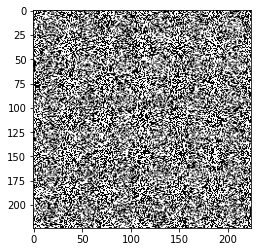

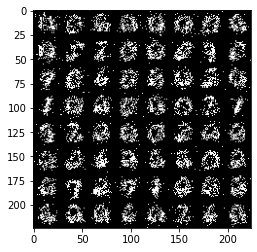

Epoch:  1


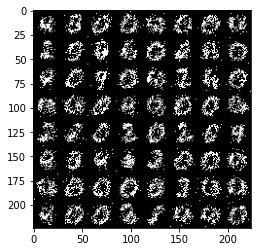

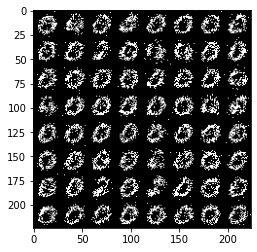

Epoch:  2


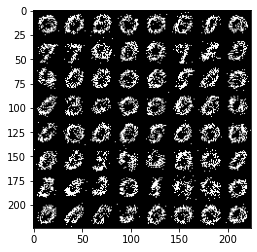

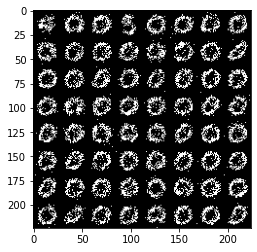

Epoch:  3


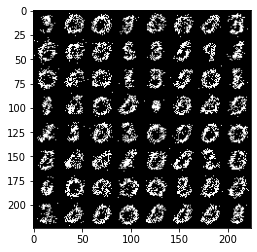

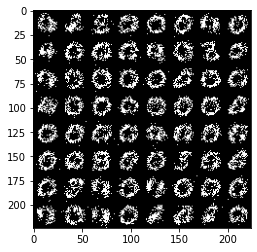

Epoch:  4


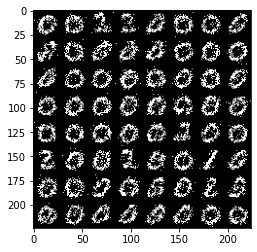

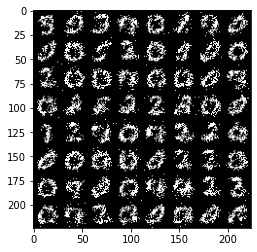

Epoch:  5
Generated sample


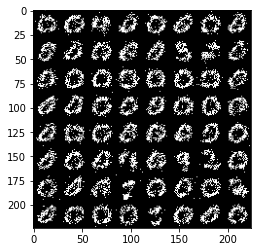

In [12]:
train(train_data, 5, remove_percent=0, hidden_nodes=20)

#### Training RBM with 100 hidden nodes


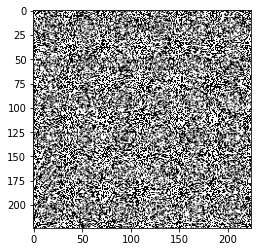

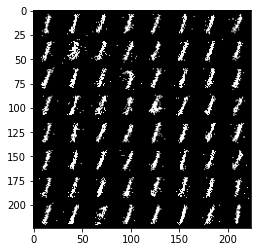

Epoch:  1


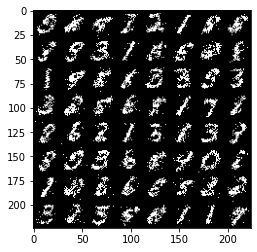

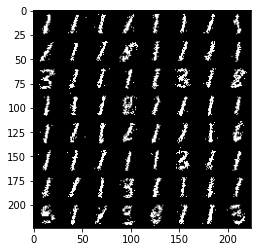

Epoch:  2


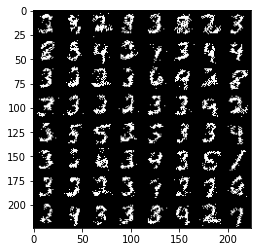

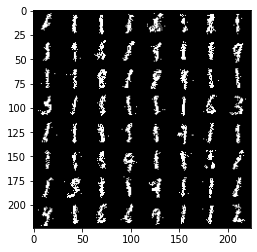

Epoch:  3


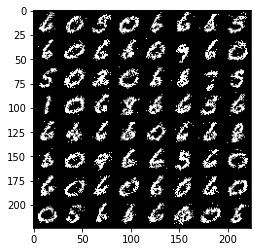

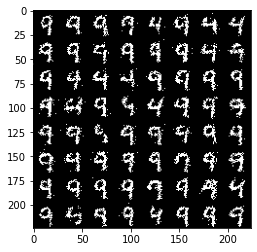

Epoch:  4


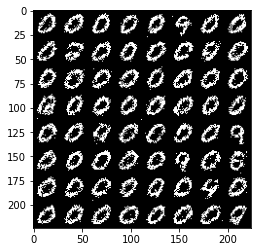

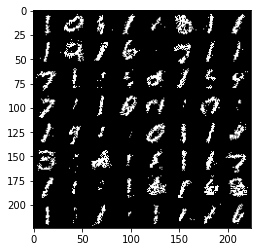

Epoch:  5
Generated sample


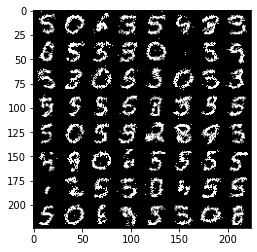

In [13]:
train(train_data, 5, remove_percent=0, hidden_nodes=100)

#### Training RBM with 500 hidden nodes


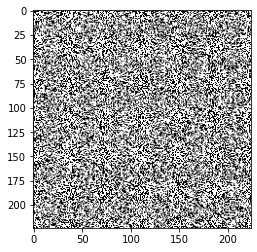

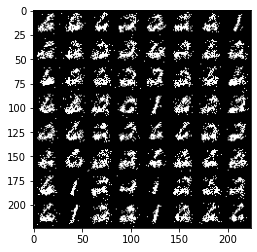

Epoch:  1


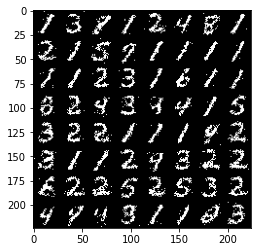

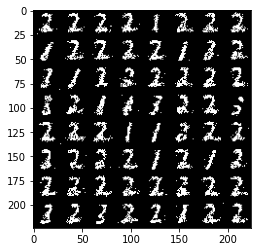

Epoch:  2


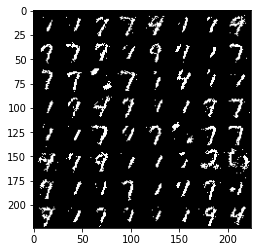

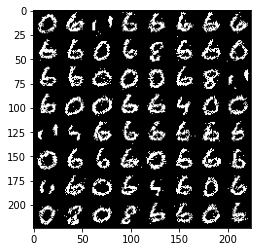

Epoch:  3


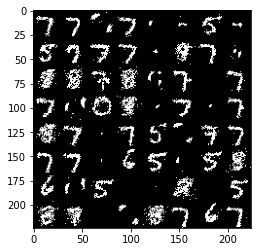

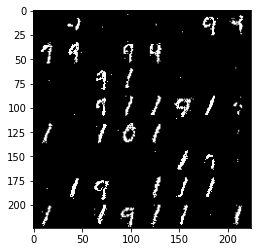

Epoch:  4


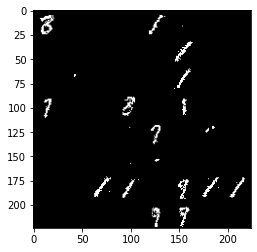

Epoch:  5
Generated sample


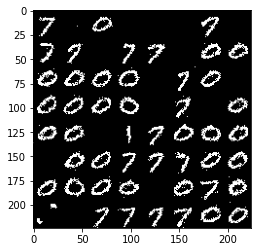

In [14]:
train(train_data, 5, remove_percent=0, hidden_nodes=500)

#### Generating MNIST using RBM with 20% of the pixels removed


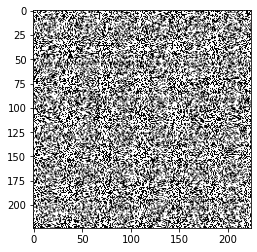

Epoch:  1
Epoch:  2
Epoch:  3


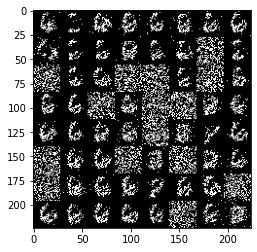

Epoch:  4
Epoch:  5
Epoch:  6


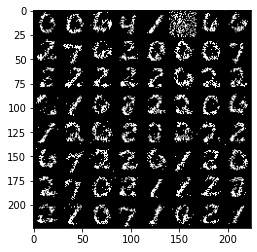

Epoch:  7
Epoch:  8
Epoch:  9


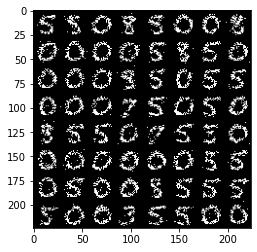

Epoch:  10
Generated sample


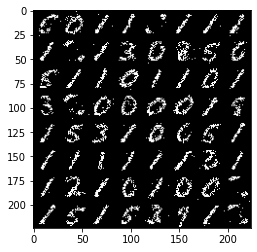

In [15]:
train(test_data, 10, remove_percent=0.2)

#### Generating MNIST using RBM with 50% of the pixels removed


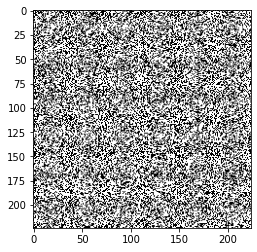

Epoch:  1
Epoch:  2
Epoch:  3


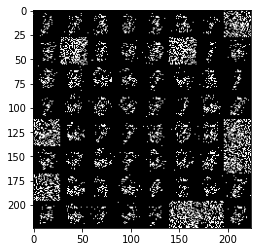

Epoch:  4
Epoch:  5
Epoch:  6


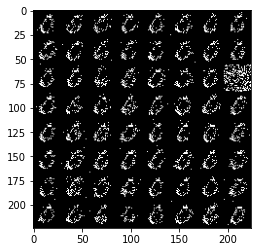

Epoch:  7
Epoch:  8
Epoch:  9


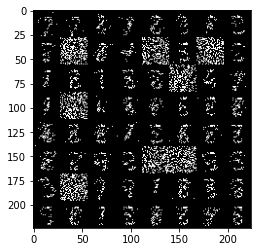

Epoch:  10
Generated sample


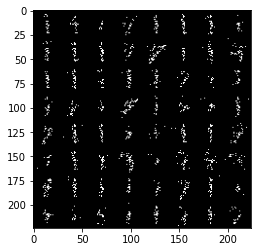

In [16]:
train(test_data, 10, remove_percent=0.5)

#### Generating MNIST using RBM with 80% of the pixels removed


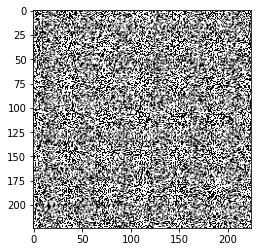

Epoch:  1
Epoch:  2
Epoch:  3


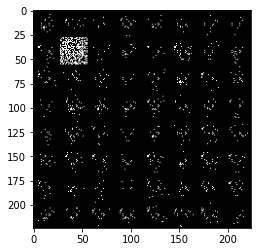

Epoch:  4
Epoch:  5
Epoch:  6


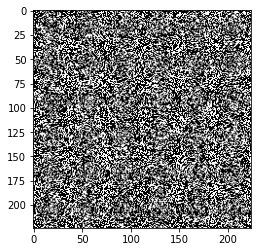

Epoch:  7
Epoch:  8
Epoch:  9


Epoch:  10
Generated sample


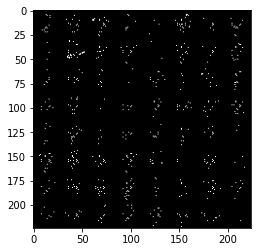

In [17]:
train(test_data, 10, remove_percent=0.8)

## Problem 2

### Derive the variational autoencoder algorithm that you will implement, and explain your derivation. Implement the training and inference algorithms for VAE.  Train VAE with 2, 8 and 16 code units to encode MNIST images using the training data set. The neural network will be 784 input -> 256 hidden -> 2/8/16 code -> 256 hidden -> 784 output. Then  use the 2 code -> 256 hidden -> 784 output part of the trained network with 2 code units to generate images by varying each code unit from -3 to 3. You are free to choose the other parameters.


Autoencoders are used to reduce the size of our inputs into a smaller representation. This smaller representation is called **latent representation**. With a lossy reconstruction, the original data can be reconstructed from the lossy representation. 

Thus, the goal of the Variational autoencoder is to find the distribution of the latent variables $q(z|x)$.<br>
<br>
The aim is to find $ p(z|x) = \frac{p(x|z)\ p(z)}{p(x)} $

Equation on RHS is intractable, so $p(z|x)$ is approximated to a distribution of $q(z)$. $z$ can be sampled from the distribution of $ q(z) $.
<br><br>
Target: $q$ should be similar to $ p(z|x) $<br>
To achieve this, the Kullback-Leibler divergence is minimized. 

\begin{equation*}
\min KL( q( z) ||p( z|x)) \ =\ -\sum q( z)\log\frac{p( z|x)}{q( z)} \quad \quad \text{-- eq 1}
\end{equation*}

Also,

\begin{equation*}
p( z|x) \ =\ \frac{p( x,\ z)}{p( x)} \quad \quad \text{-- eq 2}
\end{equation*}

Substituting eq 2 in eq 1:


\begin{equation*}
\min KL(q(z)||p(z|x))=-\sum q(z)\log\frac{\frac{p(x,z)}{p(x)}}{q(z)} =-\sum q(z)\log\frac{p(x,z)}{q(z)}\frac{1}{p(x)}
\end{equation*}


\begin{equation*}
\rightarrow -\sum q(z)\Bigl[\log (\frac{p(x,z)}{q(z)} )-\log (p(x))\Bigr]
\end{equation*}


\begin{equation*}
\rightarrow -\sum q(z)\log (\frac{p(x,z)}{q(z)} )+\sum _{z} q(z)log(p(x))=-\sum q(z)\log (\frac{p(x,z)}{q(z)} )+\log (p(x))
\end{equation*}

Therefore, 

\begin{equation*}
\log (p(x))=KL(q(z)||p(z|x))+\sum q(z)\log (\frac{p(x,\ z)}{q(z)} )
\end{equation*}

The second term is called *variational lower bound*. Minimizing the KL term is equivalent to maximizing the variational lower bound.<br>

Variational lower bound ->

\begin{equation*}
\sum q(z)\log\frac{p(x,z)}{q(z)} =\sum q(z)\log p(x|z)+\sum q(z)\log\frac{p(z)}{q(z)}
\end{equation*}

The term on the right is $\displaystyle -KL(q(z)||p(z))$

The term on the left is the *Expectation* -> $\displaystyle E_{q(z)} p(x|z)$<br>
It is the reconstruction error and is represented by binary crossentropy.<br>

Thus, the lower bound becomes 

\begin{equation*}
E_{q(z)} p(x|z)-KL(q(z)||p(z))
\end{equation*}

The reconstruction loss and the KL divergence is used as loss function in the implementation.<br>

$q((z|x)$ will be part of the neural network called encoder and the decoder is $p(x|z)$.<br><br>

The output is assumed to be a Gaussian distribution. Thus the output of VAE, which is encoder + decoder would be in Gaussian form.<br>
The aim of out autoencoder is to minimize the sum of the reconstruction loss and KL divergence which will be of the form *Gaussian distribution + KL Divergence*.<br>

\begin{equation*}
\min (|x-x'|^{2} +KL(q(z|x)||N(\mu ,\sigma ^{2} )))
\end{equation*}

Considering only the decoder part of VAE which is *generative*, the output of the encoder can be sampled to generate similar outputs.

In [18]:
from keras.layers import Lambda, Input, Dense
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras.utils import plot_model
from keras import backend as K
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [0]:
#Implementing the reparameterization trick. For this, a random unit of Gaussian is picked and is shifted by the amount defined by the mean and variance.

def epsilon_gen(latents):
    latent_mean, latent_log_var = latents
    batch = K.shape(latent_mean)[0]
    dim = K.int_shape(latent_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    #Return the shifted unit of Gaussian
    return z_mean + K.exp(0.5 * latent_log_var) * epsilon

#Plot the graphs
def plot_results(latent_dim, models, data, batch_size=128):
    encoder = models[0]
    decoder = models[1]
    
    x_test = data[0]
    y_test = data[1]

    image_size = 28
    n = 30
    mygrid = np.zeros((image_size * n, image_size * n))
    
    #Display a grid of the digits
    #Vary the mean and variance from -3 to 3 and print results
    grid_x = np.linspace(-3, 3, n)
    grid_y = np.linspace(-3, 3, n)
    
    for i, variance in enumerate(grid_y):
        for j, means in enumerate(grid_x):
            if latent_dim == 1:
                z_sample = np.array([[means,variance]*latent_dim])
            else:
                z_sample = np.random.normal(0,1,size = [batch_size,latent_dim*2])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(image_size, image_size)
            mygrid[i * image_size: (i + 1) * image_size,
                   j * image_size: (j + 1) * image_size] = digit   
    
    
    start_range = image_size // 2
    end_range = (n - 1) * image_size + start_range + 1
    tick_vals = np.arange(start_range, end_range, image_size)
    
    rangeof_x = np.round(grid_x, 1)
    rangeof_y = np.round(grid_y, 1)
    
    plt.figure(figsize=(15, 15))
    plt.xticks(tick_vals, rangeof_x)
    plt.yticks(tick_vals, rangeof_y)
    
    plt.xlabel("Mean")
    plt.ylabel("Variance")
    plt.imshow(mygrid, cmap='Greys')
    plt.show()


In [20]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
original_dim = 784

#Flattening and normalizing the dataset
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Defining the parameters
input_size = (original_dim, )
intermediate_dim = 256
batch_size = 128

11493376/11490434 [==============================] - 2s 0us/step


### VAE with 2 code units

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output model_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_2.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 485us/step - loss: 205.1854 - val_loss: 174.9142
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 171.1342 - val_loss: 168.1197
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 167.0377 - val_loss: 165.6856
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 164.9271 - val_loss: 164.2017
Epoch 5/10
60000/60000 [==============================] - 2s 30us/step - loss: 163.3582 - val_loss: 162.5476
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 162.1228 - val_loss: 161.5477
Epoch 7/10
60000/60000 [==============================] - 2s 30us/step - loss: 161.0784 - val_loss: 160.7065
Epoch 8/10
60000/60000 [==============================] - 2s 30us/step - loss: 160.1997 - val_loss: 159.9546
Epoch 9/10
60000/60000 [==============================] - 2s 30us/step - los

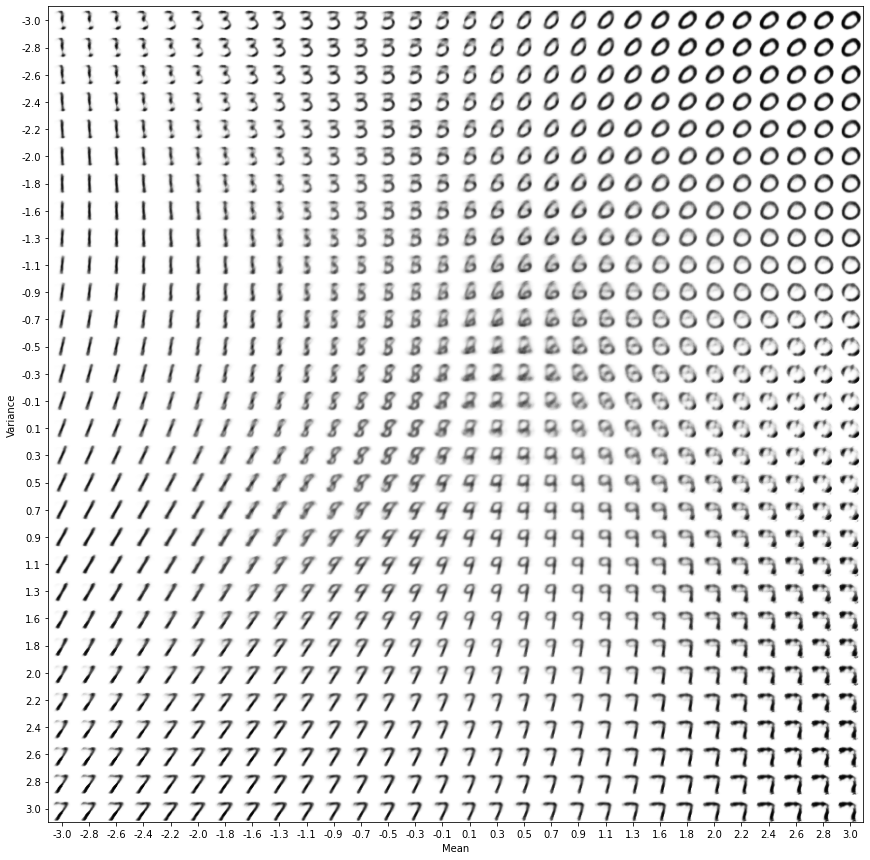

In [21]:
latent_dim = 2
epochs = 10

#Encoder
inputs = Input(shape=input_size)
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

#Epsilon_gen generates a shifted unit Gaussian, eliminating the need for solving a intranctable problem
z = Lambda(epsilon_gen)([z_mean, z_log_var])

#Creating the encoder object
encoder = Model(inputs, [z_mean, z_log_var, z])

#Decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

#Creating the decoder model
decoder = Model(latent_inputs, outputs)

#VAE Model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs)

models = (encoder, decoder)
data = (x_test, y_test)

#Loss is the sum of the reconstruction loss and the Kullback-leibler loss
reconstruction_loss = binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')

vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

plot_results(latent_dim//2, models, data)

### VAE with 8 code units

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output model_5 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_5.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 516us/step - loss: 176.7652 - val_loss: 140.5521
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 135.0090 - val_loss: 129.4490
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 128.1276 - val_loss: 125.1723
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 124.7762 - val_loss: 122.6526
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 122.6903 - val_loss: 120.8686
Epoch 6/10
60000/60000 [==============================] - 2s 29us/step - loss: 121.2228 - val_loss: 119.6901
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 120.1024 - val_loss: 118.7545
Epoch 8/10
60000/60000 [==============================] - 2s 29us/step - loss: 119.2260 - val_loss: 118.0614
Epoch 9/10
60000/60000 [==============================] - 2s 29us/step - los

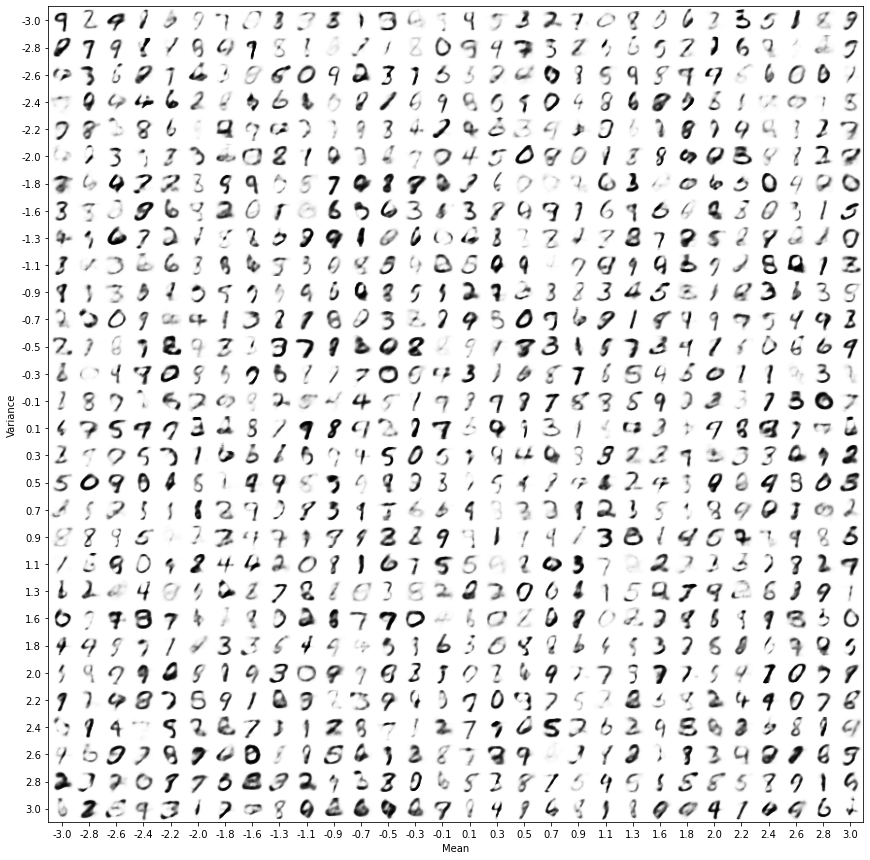

In [22]:
latent_dim = 8
epochs = 10

#Encoder
inputs = Input(shape=input_size)
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

#Epsilon_gen generates a shifted unit Gaussian, eliminating the need for solving a intranctable problem
z = Lambda(epsilon_gen, name='z')([z_mean, z_log_var])

#Creating the encoder object
encoder = Model(inputs, [z_mean, z_log_var, z])
latent_inputs = Input(shape=(latent_dim,))
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

#Decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

#Creating the decoder model
decoder = Model(latent_inputs, outputs)

#VAE Model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs)

models = (encoder, decoder)
data = (x_test, y_test)


#Loss is the sum of the reconstruction loss and the Kullback-leibler loss
reconstruction_loss = binary_crossentropy(inputs,outputs)
reconstruction_loss *= original_dim

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')

vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

plot_results(latent_dim//2, models,data, batch_size=batch_size)


### VAE with 16 code units

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output model_8 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_8.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 508us/step - loss: 172.3490 - val_loss: 132.9022
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 127.3919 - val_loss: 121.6978
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 120.0433 - val_loss: 116.8323
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 116.3648 - val_loss: 114.0373
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 114.0348 - val_loss: 112.0708
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 112.3839 - val_loss: 110.8362
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 111.2731 - val_loss: 110.0966
Epoch 8/10
60000/60000 [==============================] - 2s 29us/step - loss: 110.3816 - val_loss: 109.1946
Epoch 9/10
60000/60000 [==============================] - 2s 29us/step - los

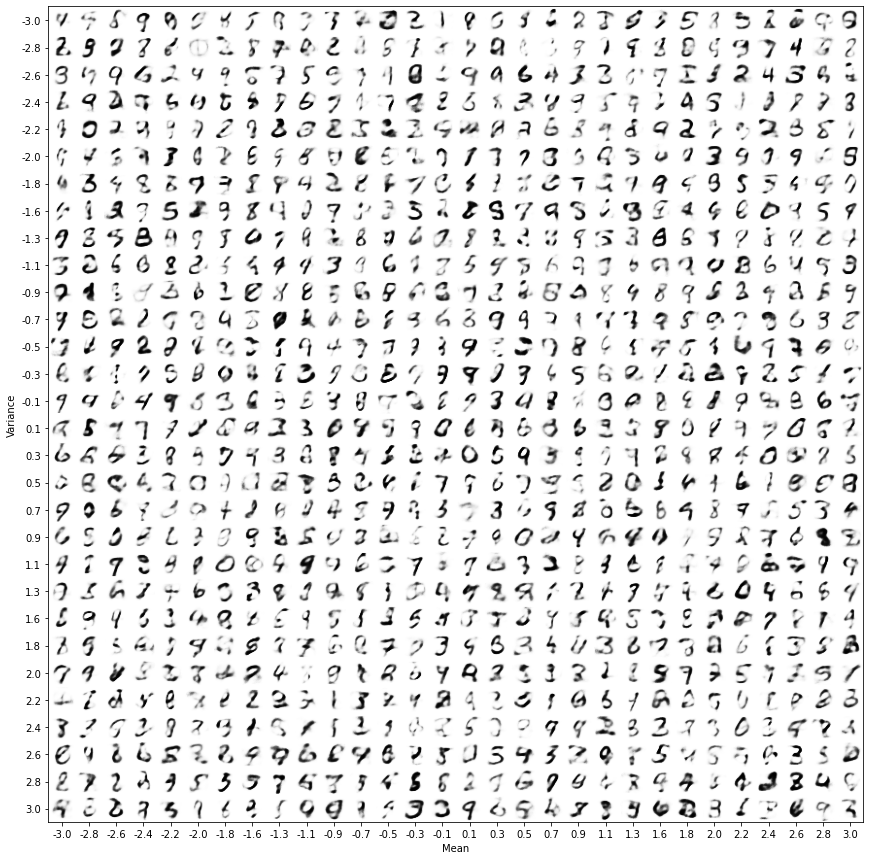

In [23]:
latent_dim = 16
epochs = 10

#Encoder
inputs = Input(shape=input_size)
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

#Epsilon_gen generates a shifted unit Gaussian, eliminating the need for solving a intranctable problem
z = Lambda(epsilon_gen, name='z')([z_mean, z_log_var])

#Creating the encoder object
encoder = Model(inputs, [z_mean, z_log_var, z])
latent_inputs = Input(shape=(latent_dim,))
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

#Decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

#Creating the decoder model
decoder = Model(latent_inputs, outputs)

#VAE Model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs)

models = (encoder, decoder)
data = (x_test, y_test)


#Loss is the sum of the reconstruction loss and the Kullback-leibler loss
reconstruction_loss = binary_crossentropy(inputs,outputs)
reconstruction_loss *= original_dim

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')

vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

plot_results(latent_dim//2, models,data, batch_size=batch_size)


## Problem 3
### (Optional) Implement VAE to generate MNIST images, where you use convolutional neural network from encoder and deconvolutional neural network for decoder. This one should be super-easy (because there are many tutorials in the Internet and you have already solved problem 2) for you to catch up with the total score. 

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.
Instructions for updating:
Use `tf.keras.layers.Conv2D` in

  0%|          | 0/429 [00:00<?, ?it/s]



Epoch:  0


100%|██████████| 429/429 [00:09<00:00, 44.50it/s] 


Training loss after epoch  1 :  0.136


<Figure size 432x288 with 0 Axes>

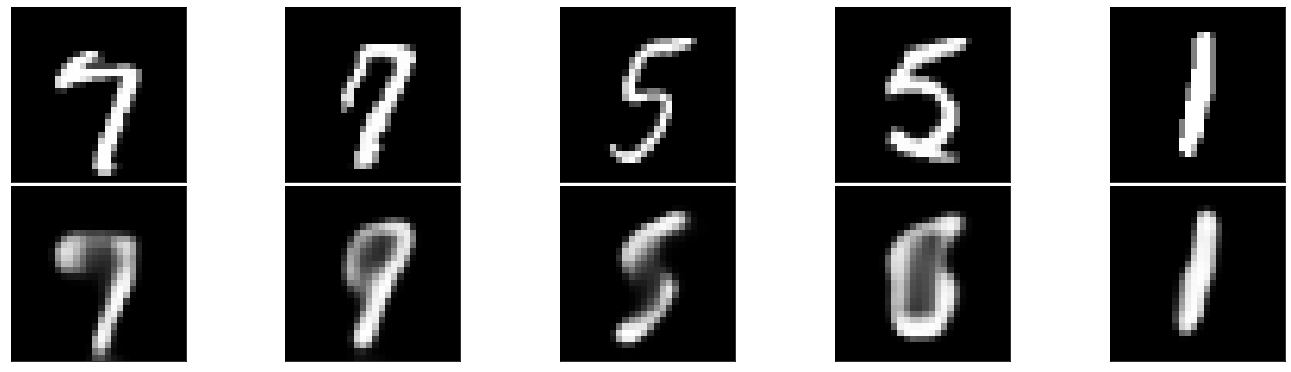

  1%|          | 3/429 [00:00<00:15, 28.36it/s]



Epoch:  1


100%|██████████| 429/429 [00:03<00:00, 127.42it/s]


Training loss after epoch  2 :  0.129


<Figure size 432x288 with 0 Axes>

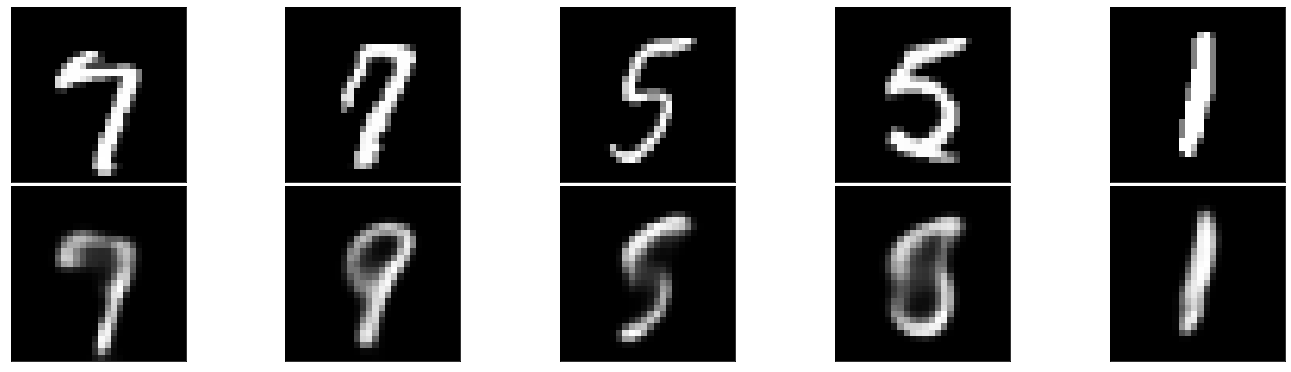

  1%|▏         | 6/429 [00:00<00:07, 58.73it/s]



Epoch:  2


100%|██████████| 429/429 [00:03<00:00, 128.92it/s]


Training loss after epoch  3 :  0.103


<Figure size 432x288 with 0 Axes>

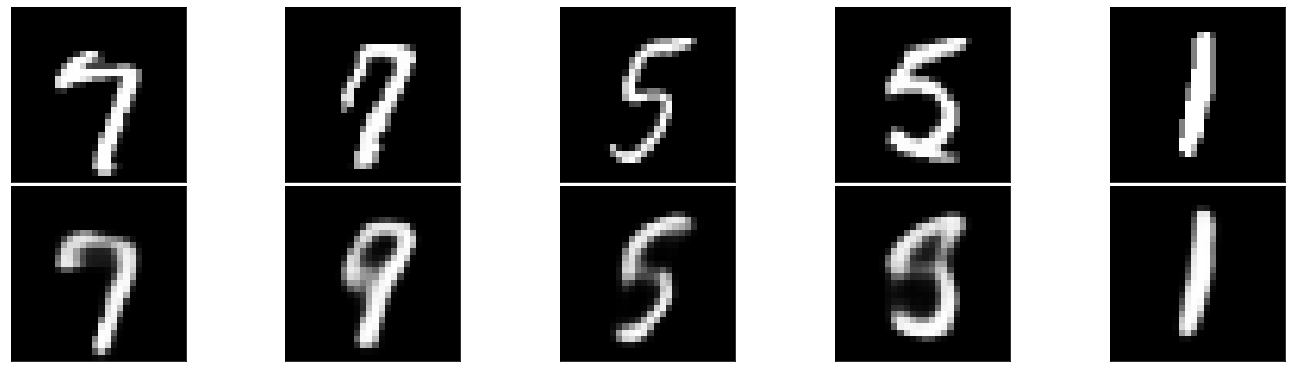

  1%|▏         | 6/429 [00:00<00:07, 57.64it/s]



Epoch:  3


100%|██████████| 429/429 [00:03<00:00, 128.20it/s]


Training loss after epoch  4 :  0.106


<Figure size 432x288 with 0 Axes>

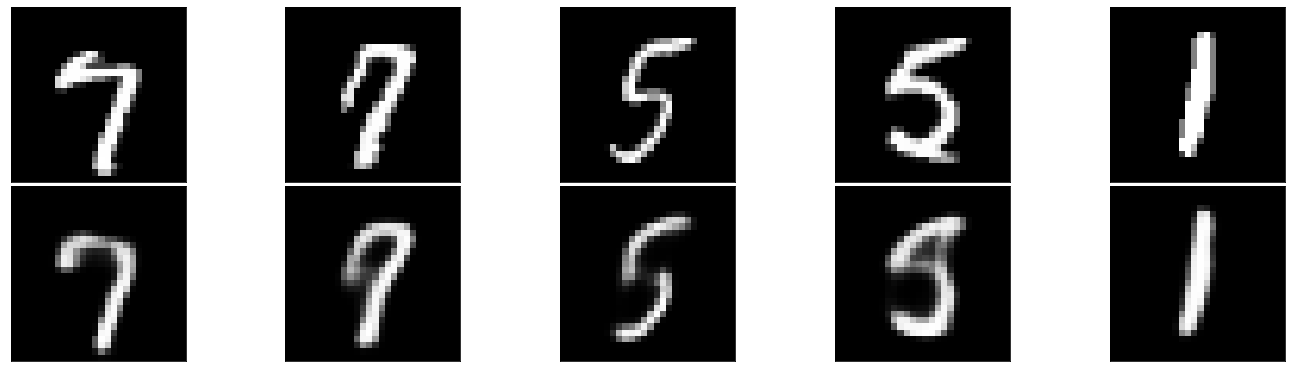

  2%|▏         | 7/429 [00:00<00:06, 65.15it/s]



Epoch:  4


100%|██████████| 429/429 [00:03<00:00, 128.48it/s]


Training loss after epoch  5 :  0.1


<Figure size 432x288 with 0 Axes>

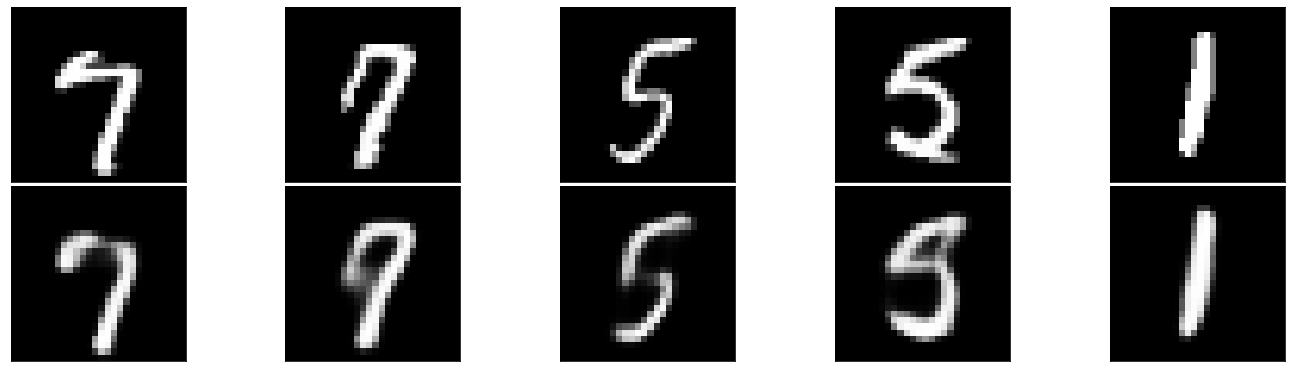

  1%|▏         | 6/429 [00:00<00:07, 57.16it/s]



Epoch:  5


100%|██████████| 429/429 [00:03<00:00, 128.54it/s]


Training loss after epoch  6 :  0.098


<Figure size 432x288 with 0 Axes>

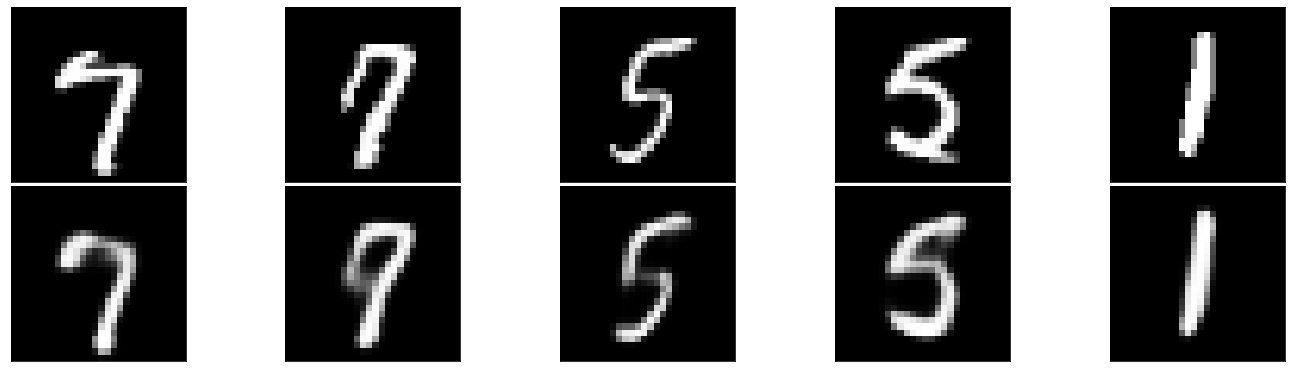

  2%|▏         | 7/429 [00:00<00:06, 65.52it/s]



Epoch:  6


100%|██████████| 429/429 [00:03<00:00, 128.69it/s]


Training loss after epoch  7 :  0.102


<Figure size 432x288 with 0 Axes>

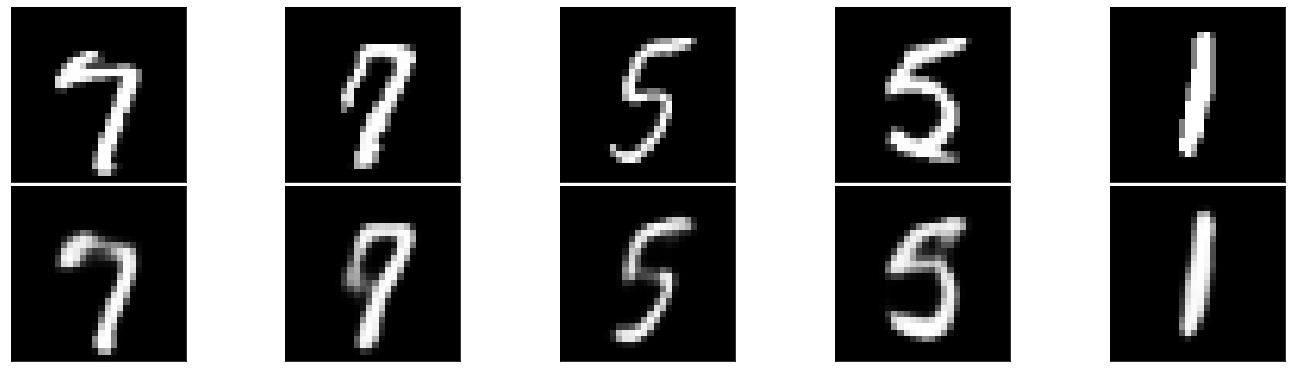

  1%|▏         | 6/429 [00:00<00:07, 56.53it/s]



Epoch:  7


100%|██████████| 429/429 [00:03<00:00, 128.32it/s]


Training loss after epoch  8 :  0.159


<Figure size 432x288 with 0 Axes>

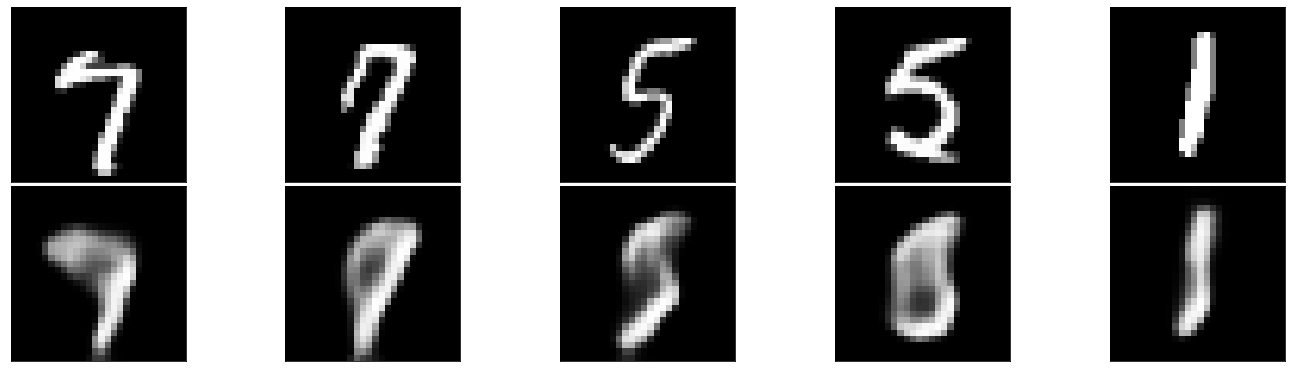

  2%|▏         | 7/429 [00:00<00:06, 65.55it/s]



Epoch:  8


100%|██████████| 429/429 [00:03<00:00, 129.07it/s]


Training loss after epoch  9 :  0.11


<Figure size 432x288 with 0 Axes>

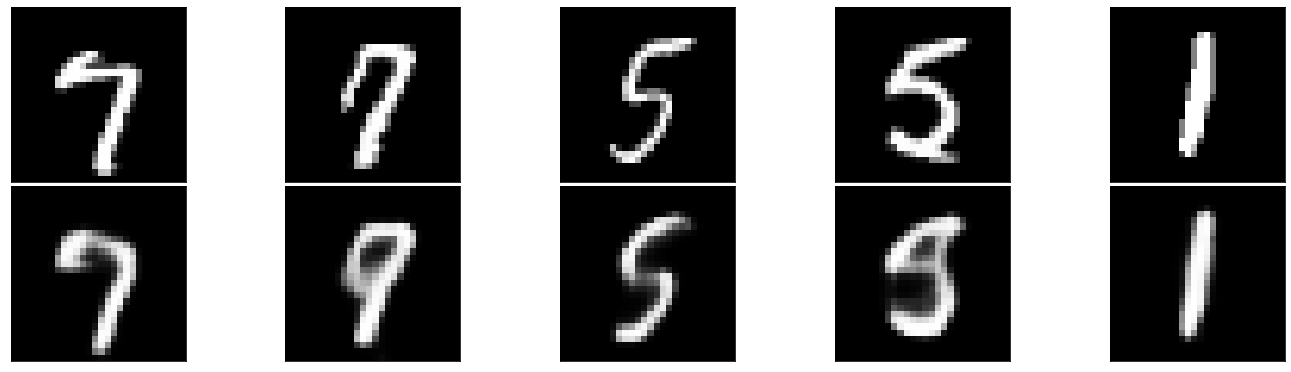

  2%|▏         | 7/429 [00:00<00:06, 62.20it/s]



Epoch:  9


100%|██████████| 429/429 [00:03<00:00, 128.39it/s]


Training loss after epoch  10 :  0.104


<Figure size 432x288 with 0 Axes>

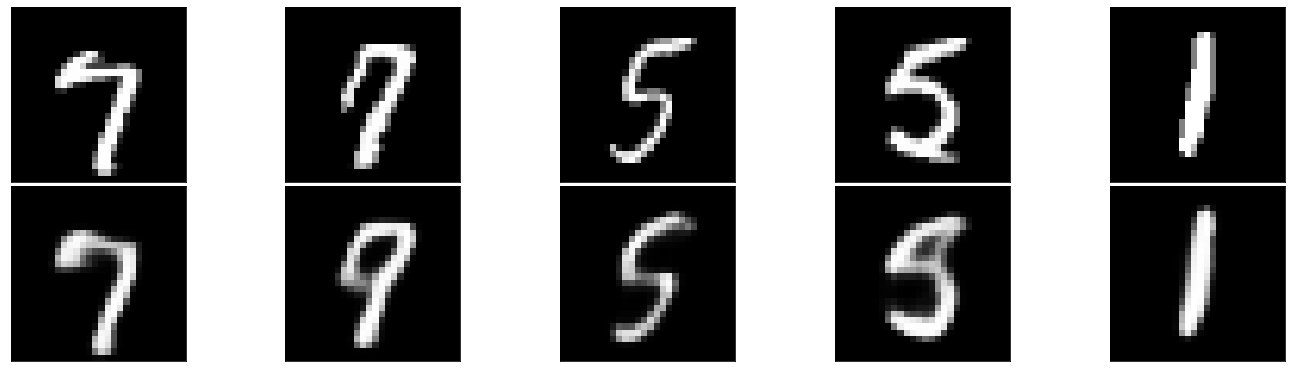

In [3]:
from tqdm import tqdm

def draw_image(original_images, modeled_images, epoch):
        plt.clf()
        f, axarr = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(20, 5))
        for img, row in zip([original_images, modeled_images], axarr):
            for image, ax in zip(img, row):
                ax.imshow(image.reshape((28,28)), cmap="gray")
                ax.xaxis.set_visible(False)
                ax.yaxis.set_visible(False)
                
        f.tight_layout(pad=0.1)
        if not os.path.exists('VAE_CNN/'):
            os.makedirs('VAE_CNN/')
        plt.savefig("VAE_CNN/Reconstruction_after_" + str(epoch+1) + "_epochs.png", bbox_inches='tight')
        plt.show()


images = read_data_sets('MNIST_data', one_hot=True)
input_mat_x, input_mat_y = (28, 28)
output_mat_x, output_mat_y = (28, 28)
input_tensor = tf.placeholder(tf.float32, [None, input_mat_x, input_mat_y, 1])
output_tensor = tf.placeholder(tf.float32, [None, output_mat_x, output_mat_y, 1])
encoder_out = 0
decoder_out = 0
logits = 0
cost = 0
optimizer = 0
    
encoder_out = tf.layers.conv2d(input_tensor, 64, kernel_size=(3, 3), padding='same', activation=tf.nn.relu)
encoder_out = tf.layers.max_pooling2d(encoder_out, pool_size=(2, 2), strides=(2, 2), padding='same')
encoder_out = tf.layers.conv2d(encoder_out, 32, kernel_size=(3, 3), padding='same', activation=tf.nn.relu)
encoder_out = tf.layers.max_pooling2d(encoder_out, pool_size=(2, 2), strides=(2, 2), padding='same')
encoder_out = tf.layers.conv2d(encoder_out, 16, kernel_size=(3, 3), padding='same', activation=tf.nn.relu)
encoder_out = tf.layers.max_pooling2d(encoder_out, pool_size=(2, 2), strides=(2, 2), padding='same')

decoder_out = tf.image.resize_nearest_neighbor(encoder_out, (7, 7))
decoder_out = tf.layers.conv2d(decoder_out, 16, kernel_size=(3, 3), padding='same', activation=tf.nn.relu)
decoder_out = tf.image.resize_nearest_neighbor(decoder_out, (14, 14))
decoder_out = tf.layers.conv2d(decoder_out, 32, kernel_size=(3, 3), padding='same', activation=tf.nn.relu)
decoder_out = tf.image.resize_nearest_neighbor(decoder_out, (28, 28))
decoder_out = tf.layers.conv2d(decoder_out, 64, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
logits = tf.layers.conv2d(decoder_out, 1, kernel_size=(3, 3), padding='same', activation=None)
decoder_out = tf.nn.sigmoid(logits)

loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=output_tensor)
cost = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)
    
sess = tf.Session()
sess.run(tf.global_variables_initializer())
np.random.shuffle(images.test.images)
test_images = images.test.images[:5]

for epoch in range(10):
    print("\n\nEpoch: ", epoch)
    for _ in tqdm(range(images.train.num_examples//128), total=images.train.num_examples//128):
        batch = images.train.next_batch(128)
        images_ = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, optimizer], feed_dict={input_tensor: images_, output_tensor: images_})

    print("Training loss after epoch ", epoch+1, ": ", round(batch_cost, 3))
    modeled_images = sess.run(decoder_out, feed_dict={input_tensor: test_images.reshape((5, 28, 28, 1))})
    draw_image(test_images, modeled_images, epoch)

## Problem 4
### (Optional) Derive and explain the GAN algorithm. Implement GAN and train it from MNIST training data set to generate digits. Show images generated from GAN.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


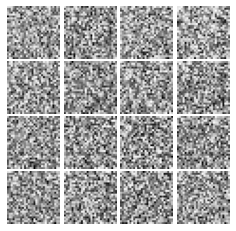

Iter: 0
Dicriminator forward-loss: 1.09
Generator forward-loss: 3.202


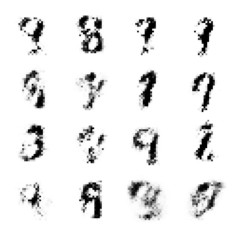

Iter: 5000
Dicriminator forward-loss: 0.2361
Generator forward-loss: 4.681


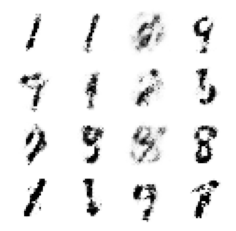

Iter: 10000
Dicriminator forward-loss: 0.4336
Generator forward-loss: 3.477


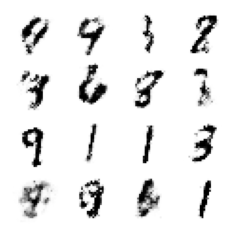

Iter: 15000
Dicriminator forward-loss: 0.8868
Generator forward-loss: 2.096


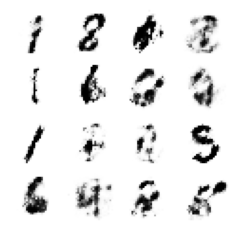

Iter: 20000
Dicriminator forward-loss: 0.9124
Generator forward-loss: 2.035


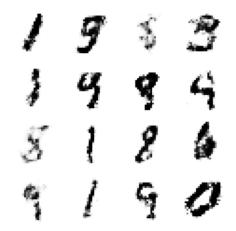

Iter: 25000
Dicriminator forward-loss: 0.8275
Generator forward-loss: 2.139


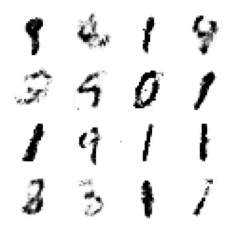

Iter: 30000
Dicriminator forward-loss: 0.6347
Generator forward-loss: 2.179


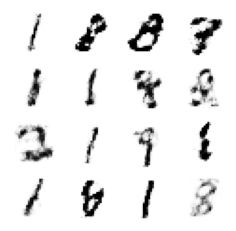

Iter: 35000
Dicriminator forward-loss: 0.6505
Generator forward-loss: 2.491


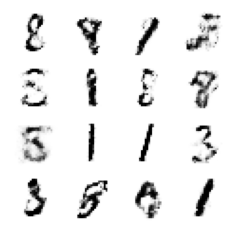

Iter: 40000
Dicriminator forward-loss: 0.6098
Generator forward-loss: 2.322


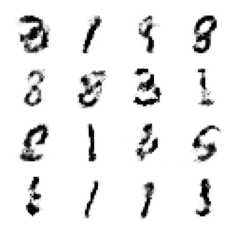

Iter: 45000
Dicriminator forward-loss: 0.5761
Generator forward-loss: 2.423


In [25]:
import matplotlib.gridspec as gridspec

def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])


def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob


def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit


def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys')

    return fig
    
X = tf.placeholder(tf.float32, shape=[None, 784])

D_W1 = tf.Variable(xavier_init([784, 128]))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

D_W2 = tf.Variable(xavier_init([128, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]


Z = tf.placeholder(tf.float32, shape=[None, 100])

G_W1 = tf.Variable(xavier_init([100, 128]))
G_b1 = tf.Variable(tf.zeros(shape=[128]))

G_W2 = tf.Variable(xavier_init([128, 784]))
G_b2 = tf.Variable(tf.zeros(shape=[784]))

theta_G = [G_W1, G_W2, G_b1, G_b2]

G_sample = generator(Z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)


D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

mb_size = 128
Z_dim = 100

mnist = read_data_sets('MNIST_data', one_hot=True)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('GAN_Output/'):
    os.makedirs('GAN_Output/')

i = 0

for it in range(50000):
    if it % 5000 == 0:
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})
        fig = plot(samples)
        plt.savefig('GAN_Output/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        #Displaying the generated image
        plt.show(fig)
        plt.close(fig)

    X_mb, _ = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})

    if it % 5000 == 0:
        print('Iter: {}'.format(it))
        #Dicriminator forward-loss
        print('Dicriminator forward-loss: {:.4}'. format(D_loss_curr))
        #Generator forward-loss
        print('Generator forward-loss: {:.4}'.format(G_loss_curr))

## REFERENCES:

[1] http://deeplearning.net/tutorial/rbm.html<br>
[2] http://ofai.at/~jan.schlueter/pubs/2014_techrep_rbm.pdf<br>
[3] http://lyy1994.github.io/machine-learning/2017/04/17/RBM-tensorflow-implementation.html<br>
[5] https://github.com/meownoid/tensorfow-rbm<br>
[6] https://www.edureka.co/blog/restricted-boltzmann-machine-tutorial/<br>
[7] https://github.com/wiseodd/generative-models/tree/master/GAN<br>